In [1]:
#1.What is Boosting in Machine Learning? Explain how it improves weak learners. 
#>>Boosting in Machine Learning is an ensemble technique that combines multiple weak learners (usually simple models like decision stumps) to create a strong learner with better overall performance.
#How it works:Train weak learners sequentially:
#Each new model is trained to correct the errors made by the previous ones.
#Assign weights:More weight is given to the misclassified examples so that the next model focuses on those harder cases.
#Combine models:The final prediction is made by weighted voting (for classification) or weighted averaging (for regression) of all the weak learners.

In [2]:
#2.What is the difference between AdaBoost and Gradient Boosting in terms of how models are trained?
#The main difference between AdaBoost and Gradient Boosting lies in how they train subsequent models. In AdaBoost, each weak learner is trained by adjusting the weights of the training samples — misclassified examples are given higher weights so that the next learner focuses more on those difficult cases. The final model is a weighted sum of all weak learners based on their accuracy. In contrast, Gradient Boosting builds models by minimizing a loss function using gradient descent. Each new learner is trained to predict the residual errors (gradients) from the previous model, effectively reducing the overall loss step by step. 
#Thus, while AdaBoost emphasizes re-weighting data points, Gradient Boosting focuses on reducing prediction errors through gradient optimization.

In [3]:
#3.How does regularization help in XGBoost?
#>>Regularization in XGBoost helps to prevent overfitting and improve the model’s generalization to unseen data.
#XGBoost includes L1 (Lasso) and L2 (Ridge) regularization terms in its objective function, which penalize complex models.
#L1 regularization encourages sparsity by driving some feature weights to zero, effectively performing feature selection.
#L2 regularization reduces the magnitude of feature weights, making the model more stable and less sensitive to noise.

In [4]:
#4.Why is CatBoost considered efficient for handling categorical data?
#>>CatBoost is considered efficient for handling categorical data because it has built-in methods to process categorical features without needing manual preprocessing like one-hot or label encoding.
#It uses a technique called "Ordered Target Encoding" (or "Ordered Boosting"), where each categorical value is converted into a number based on the target statistics (like the average label) — but calculated in a way that avoids data leakage by using only information from previous rows during training.

In [5]:
#5.What are some real-world applications where boosting techniques are preferred over bagging methods? 
#>>Boosting techniques are often preferred over bagging methods in real-world applications where high accuracy and fine-grained error correction are crucial. Some examples include:
#Customer churn prediction – Boosting models like XGBoost or LightGBM are used to capture complex patterns in customer behavior and improve retention strategies.
#Credit scoring and fraud detection – Boosting helps identify subtle indicators of fraud or credit risk that simpler models might miss.
#Search ranking and recommendation systems – Used by companies like Google and YouTube to rank results or suggest relevant content based on user preferences.
#Medical diagnosis and health analytics – Boosting can handle complex, nonlinear relationships in medical data for disease prediction.
#Marketing and ad click-through prediction – Boosting improves prediction accuracy for user responses to ads or campaigns.
#Image and text classification – Gradient boosting variants are used when interpretability and tabular data integration are important.

In [6]:
#6: Write a Python program to: ● Train an AdaBoost Classifier on the Breast Cancer dataset ● Print the model accuracy
# Import required libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the AdaBoost Classifier
model = AdaBoostClassifier(n_estimators=50, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model Accuracy: 0.9737


In [7]:
#7Write a Python program to: ● Train a Gradient Boosting Regressor on the California Housing dataset ● Evaluate performance using R-squared score
# Import required libraries
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Load the California Housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance using R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2:.4f}")

R-squared Score: 0.7756


In [10]:
#8.Write a Python program to: ● Train an XGBoost Classifier on the Breast Cancer dataset ● Tune the learning rate using GridSearchCV ● Print the best parameters and accuracy
# Step 1: Install XGBoost if not already installed
# Uncomment the following line if you haven't installed xgboost
!pip install xgboost

# Step 2: Import libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Step 3: Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Step 4: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Initialize XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Step 6: Define parameter grid for learning rate
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]
}

# Step 7: Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1)

# Step 8: Train the model
grid_search.fit(X_train, y_train)

# Step 9: Get the best model and make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Step 10: Evaluate and print results
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Model Accuracy: {accuracy:.4f}")

   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   - -------------------------------------- 1.6/56.8 MB 10.5 MB/s eta 0:00:06
   -- ------------------------------------- 4.2/56.8 MB 12.6 MB/s eta 0:00:05
   -- ------------------------------------- 4.2/56.8 MB 12.6 MB/s eta 0:00:05
   --- ------------------------------------ 5.2/56.8 MB 7.8 MB/s eta 0:00:07
   ---- ----------------------------------- 6.0/56.8 MB 6.0 MB/s eta 0:00:09
   ---- ----------------------------------- 6.8/56.8 MB 5.8 MB/s eta 0:00:09
   ---- ----------------------------------- 7.1/56.8 MB 4.8 MB/s eta 0:00:11
   ----- ---------------------------------- 7.9/56.8 MB 5.2 MB/s eta 0:00:10
   ------ --------------------------------- 8.9/56.8 MB 4.8 MB/s eta 0:00:10
   ------ --------------------------------- 8.9/56.8 MB 4.8 MB/s eta 0:00:10
   ------- -------------------------------- 10.2/56.8 MB 4.6 MB/s eta 0:00:11
   ------- -------------------------------- 10.5/56.8 MB 4.2 MB/s eta 0:00:12
 

C:\Users\Lenovo\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:37:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'learning_rate': 0.2}
Model Accuracy: 0.9561


   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.8/102.4 MB 5.6 MB/s eta 0:00:19
   - -------------------------------------- 3.9/102.4 MB 11.2 MB/s eta 0:00:09
   - -------------------------------------- 4.5/102.4 MB 8.9 MB/s eta 0:00:11
   - -------------------------------------- 4.7/102.4 MB 5.9 MB/s eta 0:00:17
   -- ------------------------------------- 5.8/102.4 MB 6.4 MB/s eta 0:00:16
   -- ------------------------------------- 6.6/102.4 MB 5.4 MB/s eta 0:00:18
   -- ------------------------------------- 6.8/102.4 MB 5.5 MB/s eta 0:00:18
   --- ------------------------------------ 8.1/102.4 MB 5.0 MB/s eta 0:00:19
   --- ------------------------------------ 8.1/102.4 MB 5.0 MB/s eta 0:00:19
   --- ------------------------------------ 9.4/102.4 MB 4.7 MB/s eta 0:00:20
   --- ------------------------------------ 9.4/102.4 MB 4.7 MB/s eta 0:00:20
   ---- ----------------------------------- 10.7/102.4 MB 4.4 MB/s eta

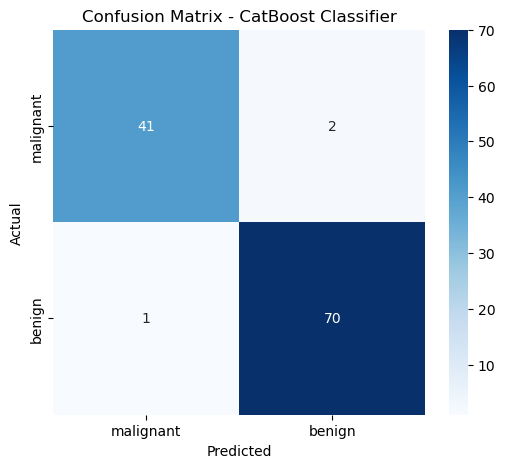

In [12]:
#9.Write a Python program to: ● Train a CatBoost Classifier ● Plot the confusion matrix using seaborn 
# Step 1: Install CatBoost if not installed
# Uncomment the following line if needed
!pip install catboost seaborn matplotlib

# Step 2: Import libraries
from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 3: Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Step 4: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Initialize and train CatBoost Classifier
model = CatBoostClassifier(verbose=0, random_state=42)
model.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = model.predict(X_test)

# Step 7: Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 8: Plot confusion matrix using seaborn
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - CatBoost Classifier')
plt.show()

In [ ]:
#10You're working for a FinTech company trying to predict loan default using customer demographics and transaction behavior. The dataset is imbalanced, contains missing values, and has both numeric and categorical features. Describe your step-by-step data science pipeline using boosting techniques: ● Data preprocessing & handling missing/categorical values ● Choice between AdaBoost, XGBoost, or CatBoost ● Hyperparameter tuning strategy ● Evaluation metrics you'd choose and why ● How the business would benefit from your model (Include your Python code and output in the code box below.) 
# Step 1: Install required libraries
# Uncomment if needed
# !pip install catboost scikit-learn imbalanced-learn

# Step 2: Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from catboost import CatBoostClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Step 3: Load dataset (example placeholder, replace with actual dataset)
# df = pd.read_csv("loan_data.csv")
# For demonstration, generate synthetic data
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=5000, n_features=10, n_informative=7, n_redundant=2, 
                           n_classes=2, weights=[0.85, 0.15], flip_y=0.01, random_state=42)
df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(10)])
df['target'] = y

# Step 4: Split features and target
X = df.drop('target', axis=1)
y = df['target']

# Step 5: Identify numeric and categorical columns (for example purposes, assume all numeric)
numeric_features = X.columns.tolist()
categorical_features = []  # Add categorical column names if any

# Step 6: Preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
    # CatBoost handles categorical features internally, so encoding not needed
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Step 7: Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Step 8: Handle imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Step 9: Initialize CatBoost Classifier
cat_model = CatBoostClassifier(verbose=0, random_state=42, class_weights=[1, 5])  # Adjust class weights

# Step 10: Create pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', cat_model)
])

# Step 11: Hyperparameter tuning
param_grid = {
    'classifier__learning_rate': [0.01, 0.05, 0.1],
    'classifier__depth': [4, 6, 8],
    'classifier__iterations': [100, 200]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train_res, y_train_res)

# Step 12: Best model evaluation
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Step 13: Metrics
print("Best Parameters:", grid_search.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

# Step 14: Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - CatBoost Loan Default Model')
plt.show()